In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('HRDataset_v14.csv')

In [2]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


# Pre Processing Data

In [3]:
# Display the first few rows of the DataFrame
print(df.head())

In [4]:
# Get summary statistics of the DataFrame
print(df.describe())

In [5]:
# Check for missing values
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [6]:
# # Remove missing values rows
df = df.dropna()

In [7]:
# Define a mapping function to replace values
def map_target(value):
  if value in [1, 2]:
    return 'NO'
  else:
    return 'YES'

# Apply the mapping function to the target column
df['PerfScoreID'] = df['PerfScoreID'].apply(map_target)

# Print the modified DataFrame
# print(df)
df['PerfScoreID']

0      YES
1      YES
2      YES
3      YES
4      YES
      ... 
306    YES
307     NO
308    YES
309    YES
310    YES
Name: PerfScoreID, Length: 311, dtype: object

In [9]:


# Define functions to calculate age and experience
def calculate_age(df, DOB, LastPerformanceReview_Date):
  """
  Calculates age based on date of birth and last performance review date.

  Args:
      df (pandas.DataFrame): The dataframe containing the data.
      dob_col (str): The column name containing the date of birth.
      review_date_col (str): The column name containing the last performance review date.

  Returns:
      pandas.Series: A new Series containing the calculated age for each employee.
  """
  from datetime import date as dt

  # Extract year from both dates
  df['year_of_review'] = pd.to_datetime(df['LastPerformanceReview_Date']).dt.year
  df['year_of_birth'] = pd.to_datetime(df['DOB']).dt.year

  # Calculate age (handling potential date inconsistencies)
  df['age'] = df['year_of_review'] - df['year_of_birth']
  df['age'] = df['age'].where(df['age'] >=18, df['age'] + 100)  # Flag potential errors by adding 100

  return df['age']

def calculate_experience(df, DateofHire, LastPerformanceReview_Date):
  """
  Calculates experience based on hire date and last performance review date.

  Args:
      df (pandas.DataFrame): The dataframe containing the data.
      hire_date_col (str): The column name containing the hire date.
      review_date_col (str): The column name containing the last performance review date.

  Returns:
      pandas.Series: A new Series containing the calculated experience for each employee.
  """
  from datetime import date

  # Extract year from both dates
  df['year_of_review'] = pd.to_datetime(df['LastPerformanceReview_Date']).dt.year
  df['year_of_hire'] = pd.to_datetime(df['DateofHire']).dt.year

  # Calculate experience (handling potential date inconsistencies)
  df['experience'] = df['year_of_review'] - df['year_of_hire']
  df['experience'] = df['experience'].where(df['experience'] > 0, df['experience'] + 100)  # Flag potential errors

  return df['experience']

# Add new features (age and experience) to the dataframe
df['age'] = calculate_age(df.copy(), 'date_of_birth', 'last_performance_review_date')
df['experience'] = calculate_experience(df.copy(), 'hire_date', 'last_performance_review_date')

# Now you can use df['age'] and df['experience'] for machine learning tasks


C:\Users\Nasim Farsid\AppData\Local\Temp\ipykernel_5180\963647798.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year_of_birth'] = pd.to_datetime(df['DOB']).dt.year


In [10]:
#here I am converting data categorical to numarical
from sklearn.preprocessing import LabelEncoder

In [11]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age,experience
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,YES,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,36,8
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,YES,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,41,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,YES,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,24,1
3,"Alagbe,Trina",10088,1,1,0,1,5,YES,0,64991,...,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,31,11
4,"Anderson, Carol",10069,0,2,0,5,5,YES,0,50825,...,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,YES,0,65893,...,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,34,5
307,"Ybarra, Catherine",10301,0,0,0,5,5,NO,0,48513,...,Google Search,PIP,3.20,2,0,9/2/2015,5,4,33,7
308,"Zamora, Jennifer",10010,0,0,0,1,3,YES,0,220450,...,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,40,9
309,"Zhou, Julia",10043,0,0,0,1,3,YES,0,89292,...,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,40,4


In [13]:
lebel = LabelEncoder()

In [14]:
df = df.apply(LabelEncoder().fit_transform)

In [15]:
df

In [16]:
# Get data types of all columns
all_dtypes = df.dtypes

print(all_dtypes)  # Output: col1    int64, col2    object, dtype: object

Employee_Name                 int32
EmpID                         int64
MarriedID                     int64
MaritalStatusID               int64
GenderID                      int64
EmpStatusID                   int64
DeptID                        int64
PerfScoreID                   int32
FromDiversityJobFairID        int64
Salary                        int64
Termd                         int64
PositionID                    int64
Position                      int32
State                         int32
Zip                           int64
DOB                           int32
Sex                           int32
MaritalDesc                   int32
CitizenDesc                   int32
HispanicLatino                int32
RaceDesc                      int32
DateofHire                    int32
DateofTermination             int32
TermReason                    int32
EmploymentStatus              int32
Department                    int32
ManagerName                   int32
ManagerID                   

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

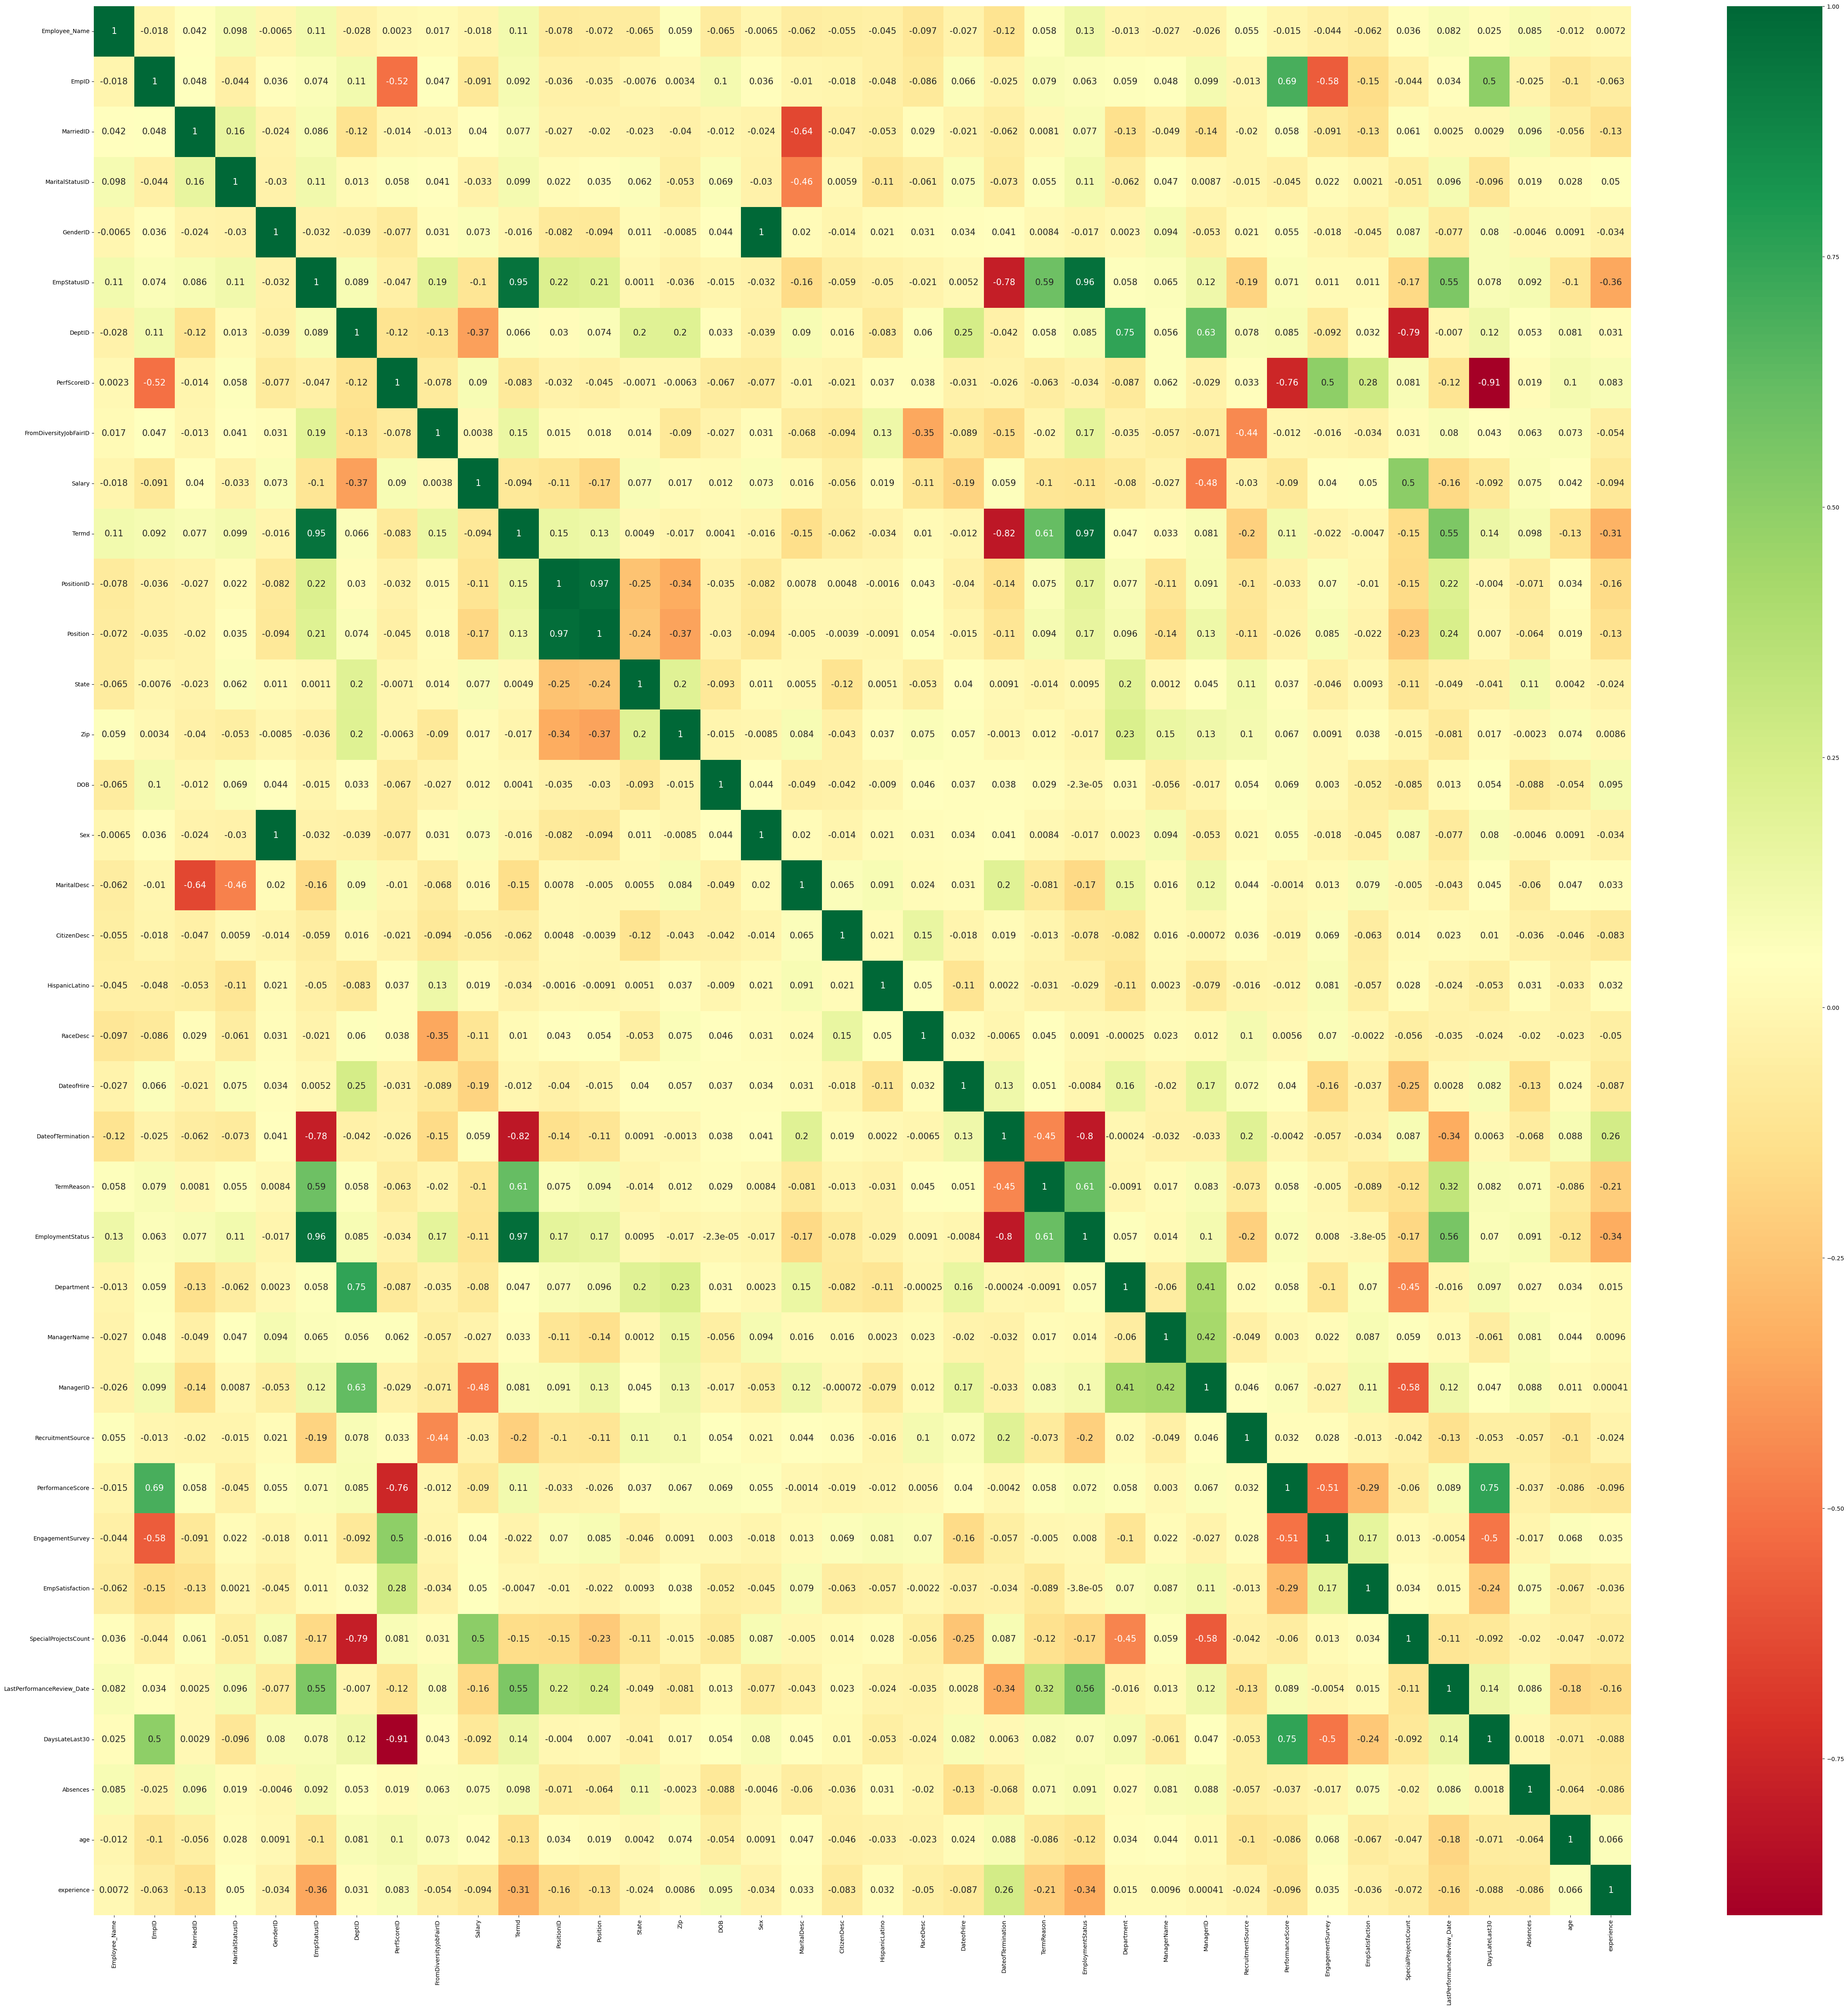

In [42]:
plt.figure(figsize=(60, 60))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [19]:
print(df.columns.tolist())

['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'age', 'experience']


=================Spletting data to Feature and Target=================

In [20]:
X=df[['MaritalDesc','Sex', 'EmploymentStatus', 'Department', 'PerformanceScore',  'Position', 'CitizenDesc', 'HispanicLatino','RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction', 'SpecialProjectsCount','Salary', 'DaysLateLast30', 'Absences', 'PerfScoreID']]
X

,MaritalDesc,Sex,EmploymentStatus,Department,PerformanceScore,Position,CitizenDesc,HispanicLatino,RaceDesc,ManagerName,RecruitmentSource,EmpSatisfaction,SpecialProjectsCount,Salary,DaysLateLast30,Absences,PerfScoreID
0,3,1,0,3,0,22,2,0,5,17,5,4,0,150,0,0,1
1,1,1,2,2,1,30,2,0,5,19,4,2,6,287,0,16,1
2,1,0,2,3,1,23,2,0,5,15,5,2,0,188,0,2,1
3,1,0,0,3,1,22,2,0,5,8,4,4,0,190,0,14,1
4,0,0,2,3,1,22,2,0,5,20,3,3,0,38,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,3,1,0,3,1,23,2,0,5,15,5,3,0,197,0,12,1
307,3,0,2,3,3,22,2,0,1,4,3,1,0,26,5,3,0
308,3,0,0,2,0,5,2,0,5,10,2,4,6,306,0,15,1
309,3,0,0,2,1,6,2,0,5,19,2,2,5,265,0,10,1


In [21]:
# select we want to get dummy
X.columns[:-5]

Index(['MaritalDesc', 'Sex', 'EmploymentStatus', 'Department',
       'PerformanceScore', 'Position', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction'],
      dtype='object')

In [22]:
# apply get dummies
df_dummies = pd.get_dummies(X, columns=X.columns[:-5], drop_first=True)
X = df_dummies

In [23]:
print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   SpecialProjectsCount  311 non-null    int64
 1   Salary                311 non-null    int64
 2   DaysLateLast30        311 non-null    int64
 3   Absences              311 non-null    int64
 4   PerfScoreID           311 non-null    int32
 5   MaritalDesc_1         311 non-null    bool 
 6   MaritalDesc_2         311 non-null    bool 
 7   MaritalDesc_3         311 non-null    bool 
 8   MaritalDesc_4         311 non-null    bool 
 9   Sex_1                 311 non-null    bool 
 10  EmploymentStatus_1    311 non-null    bool 
 11  EmploymentStatus_2    311 non-null    bool 
 12  Department_1          311 non-null    bool 
 13  Department_2          311 non-null    bool 
 14  Department_3          311 non-null    bool 
 15  Department_4          311 non-null    bool 
 16  Departme

In [24]:
y=df['PerfScoreID']
y

0      1
1      1
2      1
3      1
4      1
      ..
306    1
307    0
308    1
309    1
310    1
Name: PerfScoreID, Length: 311, dtype: int32

# Splitting Data Feature and Target

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling on feature matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# K-Nearest Neighbors (KNN) Implementing

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Assuming X_train, X_test, y_train, y_test are your train/test data and labels


# Create a KNN classifier instance
knn = KNeighborsClassifier()

# Define hyperparameter grids for tuning
knn_param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "weights": ["uniform", "distance"]
}

# Perform cross-validation and hyperparameter tuning using GridSearchCV
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring="accuracy")  # Use 5-fold CV
knn_grid_search.fit(X_train, y_train)

# Get the best-performing model and parameters
knn_best_model = knn_grid_search.best_estimator_
knn_best_params = knn_grid_search.best_params_

# Get cross-validation scores
svm_cv_results = knn_grid_search.cv_results_

# Print grid search results (optional)
print(f"\nCross-validation results:\n{svm_cv_results}")

# Make predictions on the test set using the best model
knn_y_pred = knn_best_model.predict(X_test)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, knn_y_pred)
# print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, knn_y_pred))
print(confusion_matrix(y_test, knn_y_pred))

# Calculate evaluation metrics
knn_precision = precision_score(y_test, knn_y_pred, average='macro')
knn_recall = recall_score(y_test, knn_y_pred, average='macro')
knn_f1 = f1_score(y_test, knn_y_pred, average='macro')
knn_accuracy = accuracy_score(y_test, knn_y_pred)

# Print the results
print("Best Hyperparameters:", knn_best_params)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
print("Accuracy:", knn_accuracy)


Cross-validation results:
{'mean_fit_time': array([0.00060015, 0.00060005, 0.00040016, 0.00060015, 0.00040002,
       0.00040007, 0.00060019, 0.00020008, 0.00039992, 0.00040007,
       0.        , 0.00020027, 0.00079904, 0.00020022, 0.00019999,
       0.00060019, 0.00040016, 0.00060029, 0.00060048, 0.00040007,
       0.00059996, 0.00040007, 0.00080032, 0.0006001 , 0.00060005,
       0.00040002, 0.00080018, 0.00019999, 0.0006001 , 0.00080018]), 'std_fit_time': array([0.00049002, 0.00048994, 0.0004901 , 0.00049002, 0.00048992,
       0.00048998, 0.00049006, 0.00040016, 0.0004898 , 0.00048998,
       0.        , 0.00040054, 0.00039953, 0.00040045, 0.00039997,
       0.00049006, 0.0004901 , 0.00049014, 0.00049029, 0.00048998,
       0.00048986, 0.00048998, 0.00040016, 0.00048998, 0.00048994,
       0.00048992, 0.00040009, 0.00039997, 0.00048998, 0.00040009]), 'mean_score_time': array([0.12858911, 0.02140489, 0.02283158, 0.0208046 , 0.02280502,
       0.02080536, 0.02320514, 0.02180476, 0.

# Support Vector Machine (SVM) Implementing

In [28]:
from sklearn.svm import SVC

svm_param_grid = {
    "C": [0.1, 1,5,6,7,8,9, 10,50,90, 95, 100],  # Regularization parameter
    "kernel": [ "rbf"],  # Kernel type, "poly" "linear",
    "gamma": [0.1, 0.01, 0.001, 0.0001],  # Gamma for rbf and poly kernels
}

# Create an SVC classifier instance
svm = SVC()

# Perform cross-validation and hyperparameter tuning using GridSearchCV
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=15, scoring="accuracy")  # Use 5-fold CV
svm_grid_search.fit(X_train, y_train)

# Get the best-performing model and parameters
svm_best_model = svm_grid_search.best_estimator_
svm_best_params = svm_grid_search.best_params_

# Get cross-validation scores
svm_cv_results = svm_grid_search.cv_results_

# Print grid search results (optional)
print(f"\nCross-validation results:\n{svm_cv_results}")

# Make predictions on the test set using the best model
svm_y_pred = svm_best_model.predict(X_test)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, svm_y_pred)
# print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, svm_y_pred))
print(confusion_matrix(y_test, svm_y_pred))

# Calculate evaluation metrics
svm_precision = precision_score(y_test, svm_y_pred, average='macro')
svm_recall = recall_score(y_test, svm_y_pred, average='macro')
svm_f1 = f1_score(y_test, svm_y_pred, average='macro')
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Print the results
print("Best Hyperparameters:", svm_best_params)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Accuracy:", svm_accuracy)


Cross-validation results:
{'mean_fit_time': array([0.00393414, 0.00180035, 0.00186659, 0.00166683, 0.00400093,
       0.00220003, 0.00153371, 0.00146704, 0.00318332, 0.00246714,
       0.00140045, 0.00146699, 0.00299164, 0.00180093, 0.0013289 ,
       0.00143312, 0.00305875, 0.00186799, 0.00138278, 0.0015336 ,
       0.00420081, 0.00186714, 0.00133368, 0.00133368, 0.00313403,
       0.00173364, 0.00140036, 0.00140033, 0.00313411, 0.00186718,
       0.00113358, 0.00153379, 0.00300066, 0.0019338 , 0.001267  ,
       0.00100007, 0.00306733, 0.00186721, 0.00113358, 0.00120042,
       0.00306737, 0.00173376, 0.00146699, 0.00106676, 0.0030673 ,
       0.00173368, 0.00126705, 0.00100007]), 'std_fit_time': array([7.71905513e-04, 5.41592701e-04, 4.98746248e-04, 4.71911944e-04,
       6.32585953e-04, 7.48440515e-04, 4.98898374e-04, 4.99074577e-04,
       3.70438307e-04, 1.14725215e-03, 4.90252254e-04, 4.98928036e-04,
       3.13842982e-05, 4.00363154e-04, 4.67631255e-04, 4.71526378e-04,
       

# Decision Tree Implementing

In [29]:
from sklearn.tree import DecisionTreeClassifier


# Define hyperparameter grids for tuning
dt_param_grid = {
    "max_depth": [3, 5, 7, 9, 11],  # Maximum depth of the tree
    "min_samples_split": [2, 4, 6, 8],  # Minimum number of samples required to split a node
    "criterion": ["gini", "entropy"]  # Impurity function used to split nodes
}

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

# Perform cross-validation and hyperparameter tuning using GridSearchCV
dt_grid_search = GridSearchCV(dtc, dt_param_grid, cv=5, scoring="accuracy")  # Use 5-fold CV
dt_grid_search.fit(X_train, y_train)

# Get the best-performing model and parameters
dt_best_model = dt_grid_search.best_estimator_
dt_best_params = dt_grid_search.best_params_

# Get cross-validation scores
dt_cv_results = dt_grid_search.cv_results_

# Print grid search results (optional)
print(f"\nCross-validation results:\n{dt_cv_results}")

# Make predictions on the test set using the best model
dt_y_pred = dt_best_model.predict(X_test)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, dt_y_pred)
# print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))

# Calculate evaluation metrics
dt_precision = precision_score(y_test, dt_y_pred, average='macro')
dt_recall = recall_score(y_test, dt_y_pred, average='macro')
dt_f1 = f1_score(y_test, dt_y_pred, average='macro')
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Print the results
print("Best Hyperparameters:", dt_best_params)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("Accuracy:", dt_accuracy)



Cross-validation results:
{'mean_fit_time': array([0.00120025, 0.00080013, 0.00040002, 0.0006    , 0.00060024,
       0.00040011, 0.00039992, 0.00079999, 0.00040016, 0.00060015,
       0.00060015, 0.0006001 , 0.00060039, 0.00040007, 0.00080018,
       0.00040007, 0.00060024, 0.00060019, 0.0006    , 0.00060015,
       0.00040016, 0.00080023, 0.00040007, 0.00080037, 0.00060015,
       0.0006001 , 0.00040011, 0.0006    , 0.00060019, 0.00060005,
       0.00080013, 0.00020003, 0.00080018, 0.00039997, 0.00040002,
       0.00060015, 0.0006001 , 0.00060024, 0.0006001 , 0.0006    ]), 'std_fit_time': array([0.00097966, 0.00040007, 0.00048992, 0.0004899 , 0.0004901 ,
       0.00049004, 0.0004898 , 0.00039999, 0.0004901 , 0.00049002,
       0.00049002, 0.00048998, 0.00049021, 0.00048998, 0.00040009,
       0.00048998, 0.0004901 , 0.00049006, 0.0004899 , 0.00049002,
       0.0004901 , 0.00040011, 0.00048998, 0.00040019, 0.00049002,
       0.00048998, 0.00049004, 0.0004899 , 0.00049006, 0.00048994,

# Random Forest Implementing

In [30]:
from sklearn.ensemble import RandomForestClassifier


# Define hyperparameter grids for tuning
rf_param_grid = {
    "n_estimators": [10, 20, 50, 100],  # Number of trees in the forest
    "max_depth": [3, 5, 7, 9],  # Maximum depth of individual trees
    "min_samples_split": [2, 4, 8],  # Minimum samples required to split a node
    "max_features": ["auto", "sqrt", "log2"],  # Maximum number of features considered for splitting
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Perform cross-validation and hyperparameter tuning using GridSearchCV
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring="accuracy")  # Use 5-fold CV
rf_grid_search.fit(X_train, y_train)

# Get the best-performing model and parameters
rf_best_model = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

# Get cross-validation scores
rf_cv_results = rf_grid_search.cv_results_

# Print grid search results (optional)
print(f"\nCross-validation results:\n{rf_cv_results}")

# Make predictions on the test set using the best model
rf_y_pred = rf_best_model.predict(X_test)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, rf_y_pred)
# print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

# Calculate evaluation metrics
rf_precision = precision_score(y_test, rf_y_pred, average='macro')
rf_recall = recall_score(y_test, rf_y_pred, average='macro')
rf_f1 = f1_score(y_test, rf_y_pred, average='macro')
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Print the results
print("Best Hyperparameters:", rf_best_params)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Accuracy:", rf_accuracy)



Cross-validation results:
{'mean_fit_time': array([0.00020003, 0.00019999, 0.00020018, 0.        , 0.00040011,
       0.00019994, 0.00020003, 0.00020013, 0.00019999, 0.00019999,
       0.00040016, 0.00020008, 0.0080018 , 0.01560359, 0.04122577,
       0.07983713, 0.00799913, 0.01600609, 0.03781443, 0.07720828,
       0.00800352, 0.01520596, 0.03861251, 0.07458744, 0.00800748,
       0.01763091, 0.03780861, 0.07351708, 0.00800171, 0.01500344,
       0.03740849, 0.0736166 , 0.00800185, 0.01560354, 0.03680849,
       0.07381673, 0.        , 0.00020008, 0.00020008, 0.        ,
       0.00020008, 0.00020008, 0.00040021, 0.00020008, 0.00040021,
       0.00020018, 0.00020003, 0.00040016, 0.00800633, 0.01540351,
       0.0375443 , 0.07781863, 0.00820184, 0.01580338, 0.03740854,
       0.0744164 , 0.00820184, 0.01540322, 0.03784304, 0.07487764,
       0.00800438, 0.01560693, 0.03800611, 0.07428784, 0.00801625,
       0.01539927, 0.03777909, 0.07422194, 0.00797539, 0.01569242,
       0.0374301 

C:\Users\Nasim Farsid\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nasim Farsid\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nasim Farsid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Nasim Farsid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, 

# MLP Classifier Implimenting

In [31]:
from sklearn.neural_network import MLPClassifier

# Define hyperparameter grids for tuning
param_grid = {
    "hidden_layer_sizes": [(100,), (50, 50), (100, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "lbfgs"],
    "alpha": [0.0001, 0.001],
    "learning_rate_init": [0.001, 0.01]
}

# Create an MLPClassifier instance
mlp = MLPClassifier(max_iter=500)

# Perform cross-validation and hyperparameter tuning
mlp_grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring="accuracy")
mlp_grid_search.fit(X_train, y_train)

# Get the best-performing model and parameters
mlp_best_model = mlp_grid_search.best_estimator_
mlp_best_params = mlp_grid_search.best_params_

# Get cross-validation results
mlp_cv_results = mlp_grid_search.cv_results_

# Print grid search results (optional)
print(f"\nCross-validation results:\n{mlp_cv_results}")

# Make predictions on the test set
mlp_y_pred = mlp_best_model.predict(X_test)

# # Evaluate model performance
# mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
# print(f"\nAccuracy: {accuracy:.4f}")
print(classification_report(y_test, mlp_y_pred))
print(confusion_matrix(y_test, mlp_y_pred))


# Calculate evaluation metrics
mlp_precision = precision_score(y_test, mlp_y_pred, average='macro')
mlp_recall = recall_score(y_test, mlp_y_pred, average='macro')
mlp_f1 = f1_score(y_test, mlp_y_pred, average='macro')
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)

# Print the results
print("Best Hyperparameters:", mlp_best_params)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)
print("Accuracy:", mlp_accuracy)


Cross-validation results:
{'mean_fit_time': array([0.1010232 , 0.05481572, 0.02080688, 0.01900425, 0.08645635,
       0.03000922, 0.02420545, 0.01500311, 0.0865273 , 0.03880825,
       0.02460532, 0.04160938, 0.10262299, 0.0178041 , 0.01940436,
       0.02980685, 0.08170733, 0.01700382, 0.02242141, 0.03320971,
       0.09102492, 0.0364121 , 0.02400656, 0.02634277, 0.12949948,
       0.03341336, 0.02854576, 0.01561041, 0.10497289, 0.0150033 ,
       0.02362347, 0.01460567, 0.09498243, 0.03960886, 0.02500572,
       0.04100928, 0.13343   , 0.02140493, 0.02540598, 0.03100672,
       0.09982934, 0.01380501, 0.02540846, 0.01600461, 0.09886794,
       0.03919425, 0.03041062, 0.04121614]), 'std_fit_time': array([0.02255305, 0.05106743, 0.00097905, 0.003163  , 0.00612176,
       0.02610736, 0.00306003, 0.00154948, 0.01021006, 0.02661716,
       0.00185522, 0.02924755, 0.01627111, 0.00172083, 0.0011999 ,
       0.0232464 , 0.00614585, 0.00126538, 0.00233042, 0.02693357,
       0.01178505, 0.02

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Learning curve

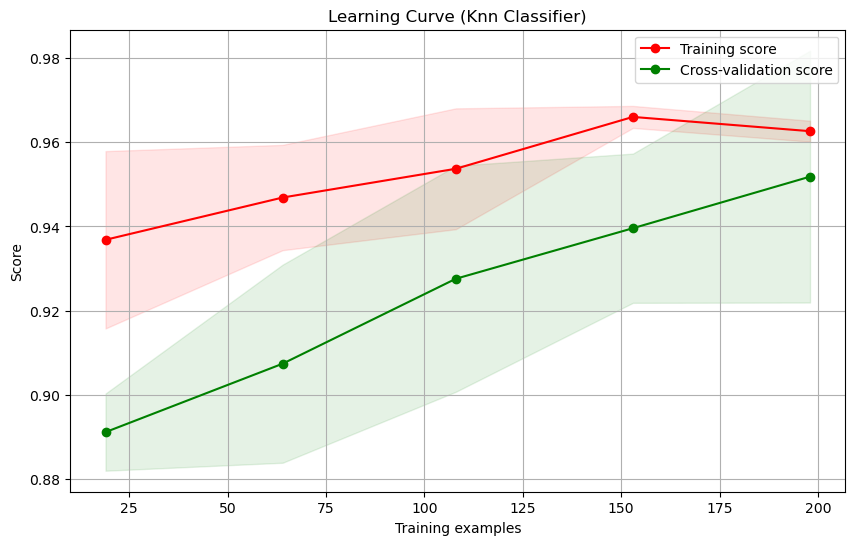

In [34]:
#  Knn Classifier
title = "Learning Curve (Knn Classifier)"
cv = 5  # Cross-validation folds
plot_learning_curve(knn_best_model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

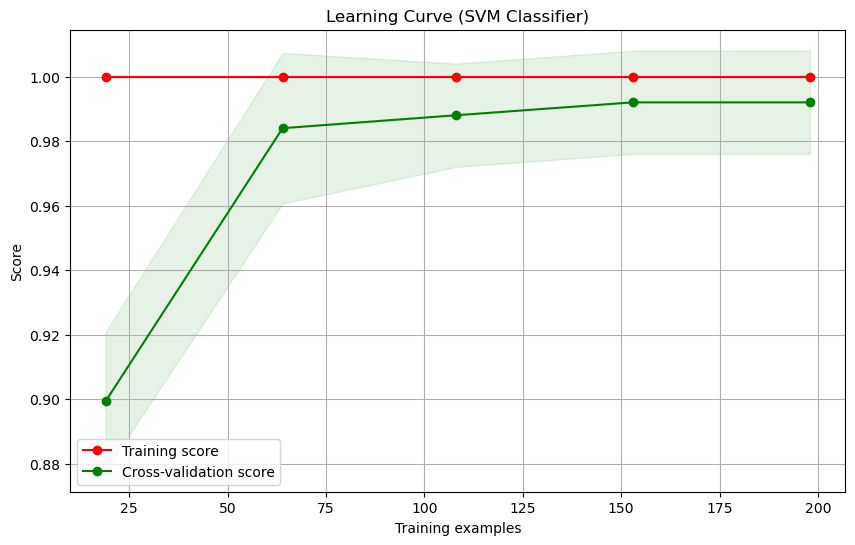

In [35]:
# SVM Classifier
title = "Learning Curve (SVM Classifier)"
cv = 5  # Cross-validation folds
plot_learning_curve(svm_best_model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

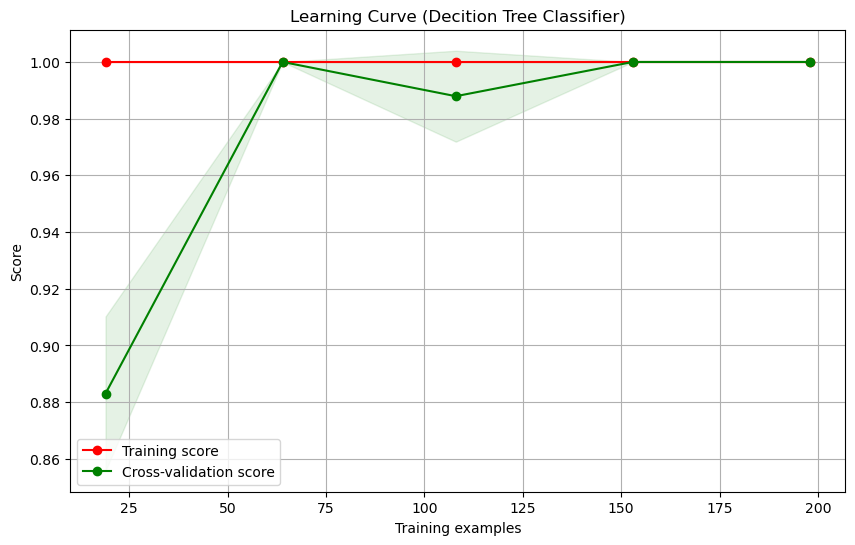

In [36]:
# Decition Tree Classifier
title = "Learning Curve (Decition Tree Classifier)"
cv = 5  # Cross-validation folds
plot_learning_curve(dt_best_model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

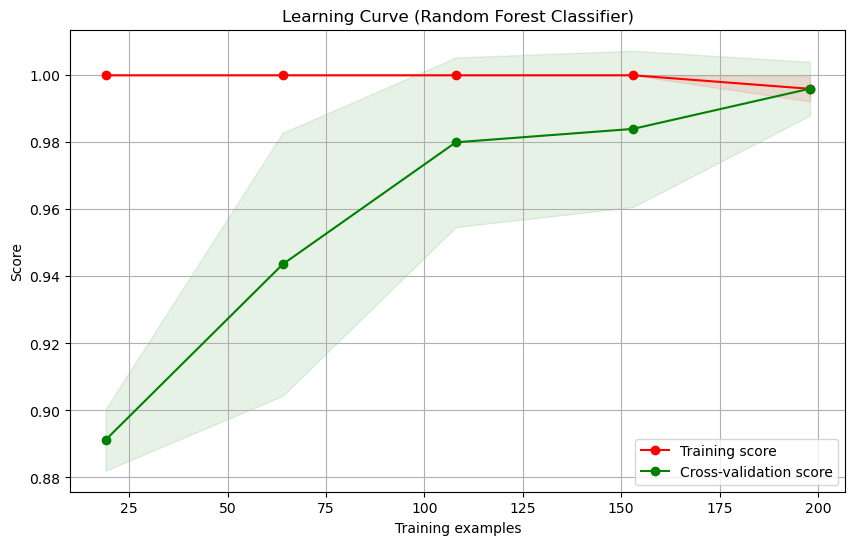

In [37]:
# Random Forest Classifier
title = "Learning Curve (Random Forest Classifier)"
cv = 5  # Cross-validation folds
plot_learning_curve(rf_best_model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

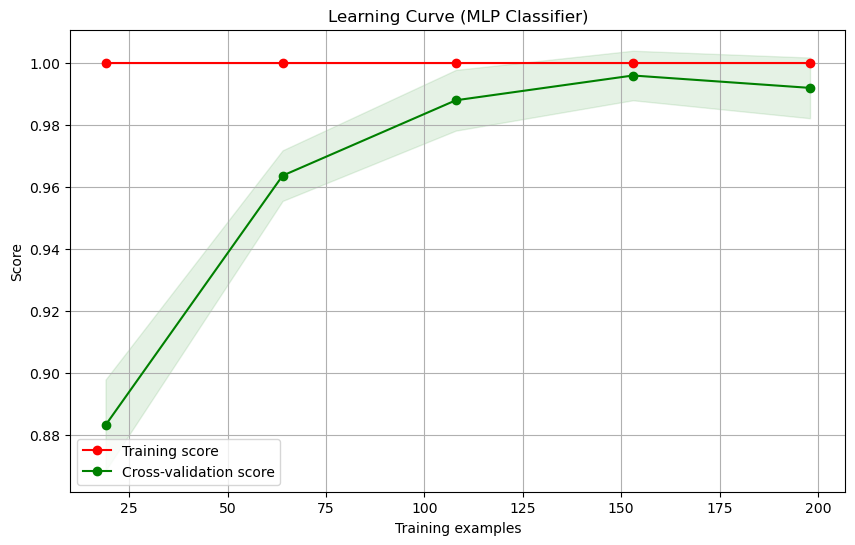

In [38]:
# MLP Classifier
title = "Learning Curve (MLP Classifier)"
cv = 5  # Cross-validation folds
plot_learning_curve(mlp_best_model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

# ROC Curve and Precision Recall Curve

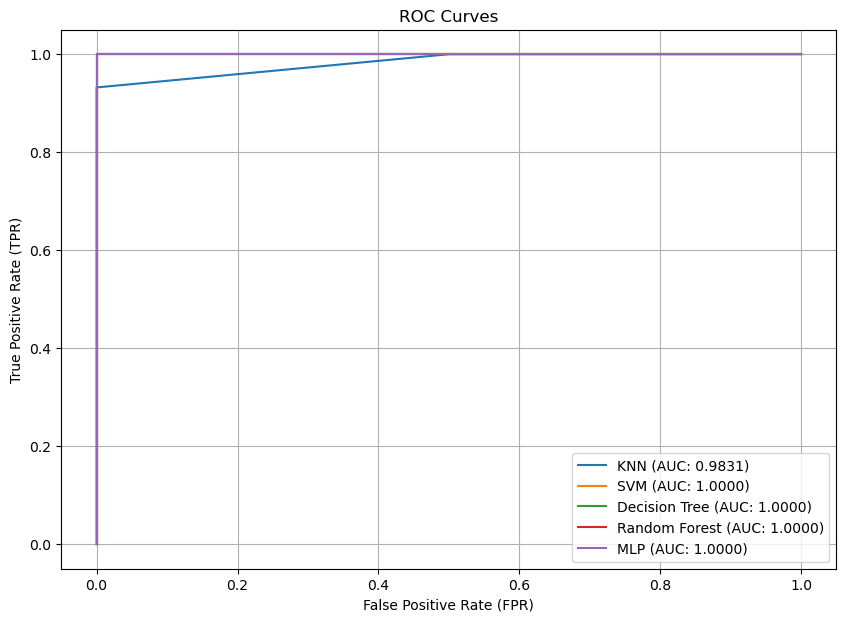

In [44]:
from sklearn.metrics import roc_curve, auc

# Define models and name list
models = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(kernel="linear", probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("MLP", MLPClassifier()),
]

# Plot ROC curves for each model
plt.figure(figsize=(10, 7))
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc:.4f})")

plt.title("ROC Curves")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

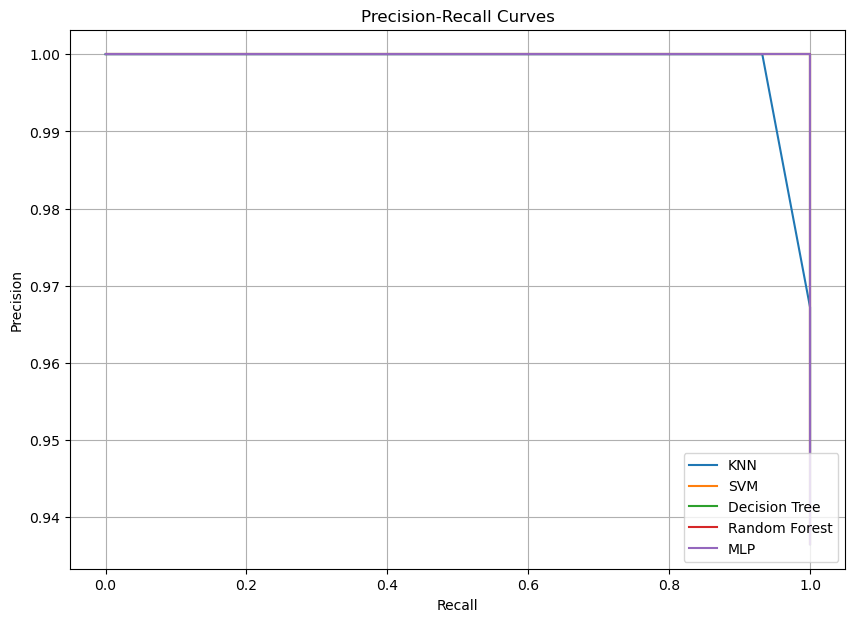

In [40]:
from sklearn.metrics import precision_recall_curve


# Define models and name list
models = [
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(kernel="linear", probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("MLP", MLPClassifier()),
]

# Plot precision-recall curves for each model
plt.figure(figsize=(10, 7))
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred = model.predict_proba(X_test)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f"{name}")

plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.grid()
plt.show()

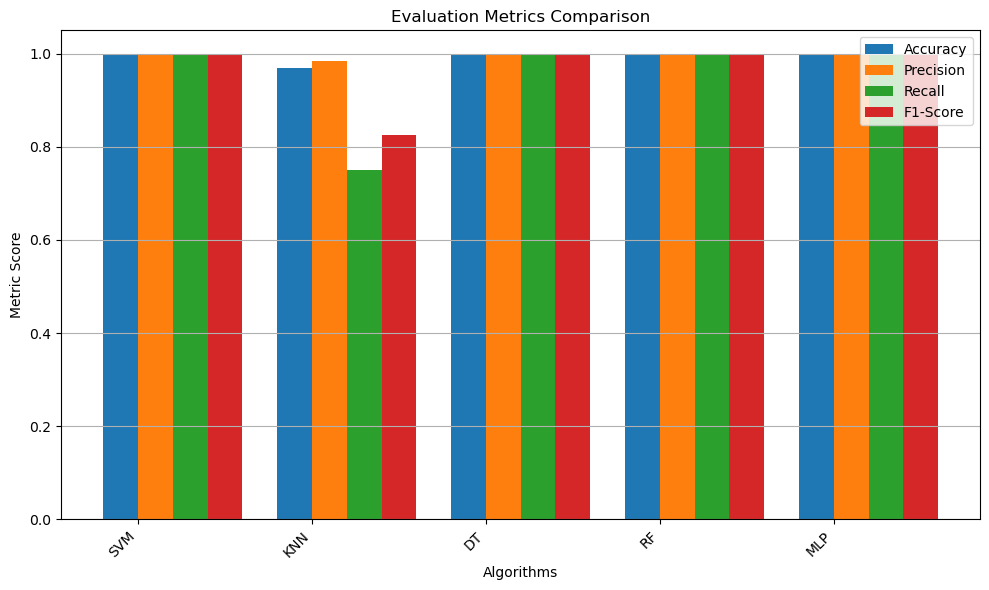

In [41]:
# Assuming you have pre-calculated accuracy, precision, recall, and F1-score for each algorithm
# (replace 'svm_accuracy', ..., 'rf_f1' with your actual values)
algorithms = ['SVM', 'KNN', 'DT', 'RF', 'MLP']
accuracy = [svm_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy]
precision = [svm_precision, knn_precision, dt_precision, rf_precision, mlp_precision]
recall = [svm_recall, knn_recall, dt_recall, rf_recall, mlp_recall]
f1 = [svm_f1, knn_f1, dt_f1, rf_f1, mlp_f1]

# Create separate bars for each metric
x = np.arange(len(algorithms))  # Positions of bars on the x-axis
width = 0.2  # Width of each bar

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create and label bar charts for each metric
bar1 = plt.bar(x - width/2, accuracy, width, label='Accuracy')
bar2 = plt.bar(x + width/2, precision, width, label='Precision')
bar3 = plt.bar(x + 3*width/2, recall, width, label='Recall')
bar4 = plt.bar(x + 5*width/2, f1, width, label='F1-Score')

# Set labels and title
plt.xlabel('Algorithms')
plt.ylabel('Metric Score')
plt.title('Evaluation Metrics Comparison')

# Add legend and grid
plt.legend()
plt.grid(axis='y')

# Adjust x-axis tick positions to align with bar centers
plt.xticks(x, algorithms)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()